In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import xgboost as xgb

In [2]:
data_path = "D:/data/plasticc/"

train_file = "training_set.csv"
train_meta_file = "training_set_metadata.csv"

test_set_sample_file = "test_set_sample.csv"
test_set_file = "test_set.csv"
test_meta_file ="test_set_metadata.csv"



In [5]:
train_data = pd.read_csv(data_path + train_file)
train_metadata = pd.read_csv(data_path + train_meta_file)


In [6]:
train_data.groupby(train_data.object_id).describe()

detected                                                flux  \
             count      mean       std  min  25%  50%  75%  max  count   
object_id                                                                
615          352.0  0.946023  0.226295  0.0  1.0  1.0  1.0  1.0  352.0   
713          350.0  0.171429  0.377423  0.0  0.0  0.0  0.0  1.0  350.0   
730          330.0  0.069697  0.255022  0.0  0.0  0.0  0.0  1.0  330.0   
745          351.0  0.173789  0.379469  0.0  0.0  0.0  0.0  1.0  351.0   
1124         352.0  0.173295  0.379041  0.0  0.0  0.0  0.0  1.0  352.0   
1227         330.0  0.009091  0.095056  0.0  0.0  0.0  0.0  1.0  330.0   
1598         352.0  0.056818  0.231824  0.0  0.0  0.0  0.0  1.0  352.0   
1632         352.0  0.008523  0.092055  0.0  0.0  0.0  0.0  1.0  352.0   
1920         255.0  0.215686  0.412106  0.0  0.0  0.0  0.0  1.0  255.0   
1926         255.0  0.011765  0.108037  0.0  0.0  0.0  0.0  1.0  255.0   
2072         351.0  0.065527  0.247807  0.0  0.0  0.0  0.0  1.0  351.0   
2103         352.0  0.096591  0.295820  0.0  0.0  0.0  0.0  1.0  352.0   
2300         351.0  0.082621  0.275702  0.0  0.0  0.0  0.0  1.0  351.0   
2330         351.0  0.005698  0.075377  0.0  0.0  0.0  0.0  1.0  351.0   
2624         352.0  0.025568  0.158068  0.0  0.0  0.0  0.0  1.0  352.0   
2677         350.0  0.168571  0.374909  0.0  0.0  0.0  0.0  1.0  350.0   
2922         352.0  0.164773  0.371503  0.0  0.0  0.0  0.0  1.0  352.0   
3041         352.0  0.028409  0.166375  0.0  0.0  0.0  0.0  1.0  352.0   
3285         255.0  0.125490  0.331925  0.0  0.0  0.0  0.0  1.0  255.0   
3423         352.0  0.031250  0.174240  0.0  0.0  0.0  0.0  1.0  352.0   
3489         255.0  0.149020  0.356808  0.0  0.0  0.0  0.0  1.0  255.0   
3910         351.0  0.028490  0.166606  0.0  0.0  0.0  0.0  1.0  351.0   
4088         351.0  0.977208  0.149453  0.0  1.0  1.0  1.0  1.0  351.0   
4132         351.0  0.082621  0.275702  0.0  0.0  0.0  0.0  1.0  351.0   
4171         351.0  0.279202  0.449248  0.0  0.0  0.0  1.0  1.0  351.0   
4173         255.0  0.301961  0.460011  0.0  0.0  0.0  1.0  1.0  255.0   
4220         351.0  0.136752  0.344076  0.0  0.0  0.0  0.0  1.0  351.0   
4389         255.0  0.227451  0.420011  0.0  0.0  0.0  0.0  1.0  255.0   
4595         352.0  0.156250  0.363609  0.0  0.0  0.0  0.0  1.0  352.0   
4819         330.0  0.221212  0.415693  0.0  0.0  0.0  0.0  1.0  330.0   
...            ...       ...       ...  ...  ...  ...  ...  ...    ...   
130219752    124.0  0.064516  0.246667  0.0  0.0  0.0  0.0  1.0  124.0   
130231675    146.0  0.034247  0.182488  0.0  0.0  0.0  0.0  1.0  146.0   
130263372    146.0  0.027397  0.163800  0.0  0.0  0.0  0.0  1.0  146.0   
130312781    144.0  0.111111  0.315367  0.0  0.0  0.0  0.0  1.0  144.0   
130319749    133.0  0.142857  0.351250  0.0  0.0  0.0  0.0  1.0  133.0   
130330088    144.0  0.020833  0.143325  0.0  0.0  0.0  0.0  1.0  144.0   
130359176    134.0  0.014925  0.121709  0.0  0.0  0.0  0.0  1.0  134.0   
130375489    135.0  0.051852  0.222554  0.0  0.0  0.0  0.0  1.0  135.0   
130386135    143.0  0.034965  0.184337  0.0  0.0  0.0  0.0  1.0  143.0   
130402542     85.0  0.047059  0.213021  0.0  0.0  0.0  0.0  1.0   85.0   
130408188    112.0  0.133929  0.342106  0.0  0.0  0.0  0.0  1.0  112.0   
130414189    133.0  0.172932  0.379619  0.0  0.0  0.0  0.0  1.0  133.0   
130489916    110.0  0.154545  0.363125  0.0  0.0  0.0  0.0  1.0  110.0   
130552230    129.0  0.062016  0.242124  0.0  0.0  0.0  0.0  1.0  129.0   
130595291    126.0  0.142857  0.351324  0.0  0.0  0.0  0.0  1.0  126.0   
130617044    145.0  0.137931  0.346023  0.0  0.0  0.0  0.0  1.0  145.0   
130622528    140.0  0.014286  0.119092  0.0  0.0  0.0  0.0  1.0  140.0   
130639669    125.0  0.128000  0.335434  0.0  0.0  0.0  0.0  1.0  125.0   
130659834    106.0  0.056604  0.232182  0.0  0.0  0.0  0.0  1.0  106.0   
130678775    141.0  0.021277  0.144819  0.0  0.0  0.0  0.0  1.0  141.0   
130684460    1

passband
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

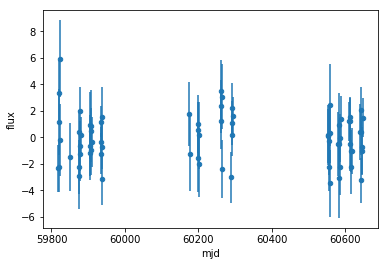

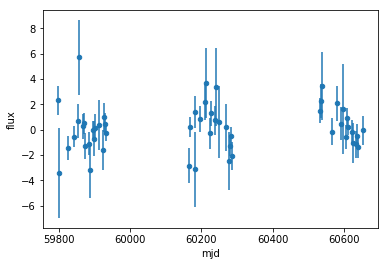

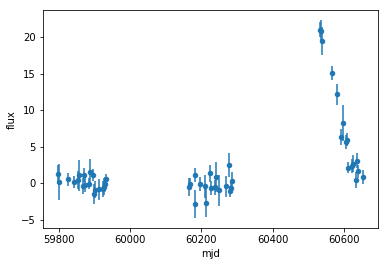

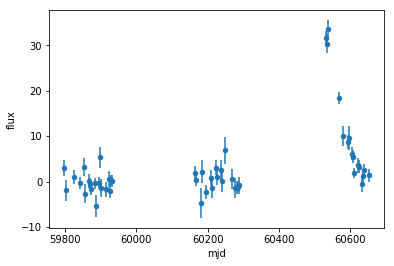

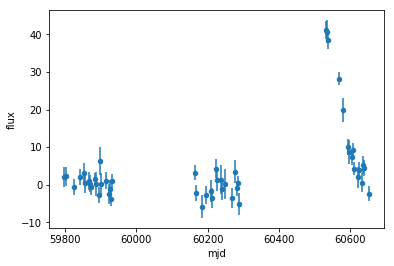

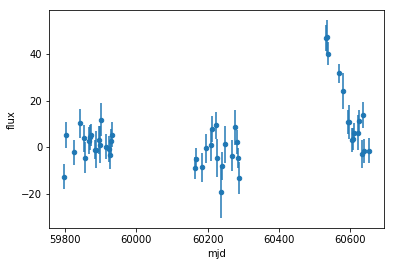

In [21]:
obj = train_data[train_data.object_id == 730]
obj.groupby("passband").plot(x="mjd", y="flux", yerr="flux_err", kind="scatter")


baseline: find slope, mean, std, mean_err? per passband and window = 4*3*6 = 72 features per obj